In [1]:
import sys

sys.path.append('../')

from model_v2 import  *
from data import *
import os
import keras
import cv2
from keras.callbacks import TensorBoard
import tensorflow as tf
import keras.backend.tensorflow_backend as K
import matplotlib.pyplot as plt

config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)
K.set_session(sess)

Using TensorFlow backend.


In [2]:
train_path = "../640x400_small"
image_folder = "train"
label_folder = "trainannot"
valid_path =  "../640x400_small"
valid_image_folder ="val"
valid_label_folder = "valannot"
test_path = '../640x400_small/test/'
log_filepath = '../log'
flag_multi_class = True
num_classes = 4

dp = data_preprocess(
    train_path=train_path,image_folder=image_folder,label_folder=label_folder,
    valid_path=valid_path,valid_image_folder=valid_image_folder,valid_label_folder=valid_label_folder,
    flag_multi_class=flag_multi_class, num_classes=num_classes, 
    test_path=test_path, img_rows=640, img_cols=400, 
)

# train your own model
train_data = dp.trainGenerator(batch_size=2)
valid_data = dp.validLoad(batch_size=2)
test_data = dp.testGenerator()

In [3]:
model = unet(num_class=4, input_size=(640, 400, 3))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 640, 400, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 640, 400, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 640, 400, 16) 2320        conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxP

In [4]:
tb_cb = TensorBoard(log_dir=log_filepath)
model_checkpoint = keras.callbacks.ModelCheckpoint(
    '../model/Opends_model_v1.hdf5', monitor='val_loss', verbose=1, save_best_only=True
)

history = model.fit_generator(
    train_data,
    steps_per_epoch=200, epochs=10,
    validation_steps=1,
    validation_data=valid_data,
    callbacks=[model_checkpoint, tb_cb]
)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/10
Found 112 images belonging to 1 classes.
Found 421 images belonging to 1 classes.
Found 112 images belonging to 1 classes.
Found 421 images belonging to 1 classes.
200/200 [==============================] - 82s 410ms/step - loss: -0.0596 - acc: 0.0153 - val_loss: -0.0571 - val_acc: 0.0100

Epoch 00001: val_loss improved from inf to -0.05712, saving model to ../model/Opends_model_v1.hdf5
Epoch 2/10
200/200 [==============================] - 78s 388ms/step - loss: -0.0608 - acc: 0.0116 - val_loss: -0.0572 - val_acc: 0.0103

Epoch 00002: val_loss improved from -0.05712 to -0.05716, saving model to ../model/Opends_model_v1.hdf5
Epoch 3/10
200/200 [==============================] - 78s 390ms/step - loss: -0.0604 - acc: 0.0115 - val_loss: -0.0592 - val_acc: 0.0111

Epoch 00003: val_loss improved from -0.05716 to -0.05920, saving model to ../model/Opends_mod

In [5]:
img = next(dp.testGenerator())
img.shape

(1, 640, 400, 3)

In [6]:
pred = model.predict(img)
pred.shape

(1, 640, 400, 3)

In [7]:
np.unique(pred*255)

array([0.0000000e+00, 3.0032930e-36, 3.0035448e-36, ..., 2.5499994e+02,
       2.5499997e+02, 2.5500000e+02], dtype=float32)

In [8]:
(pred*255).astype(np.uint8)[0, 300, 200, :]

array([  0, 255,   0], dtype=uint8)

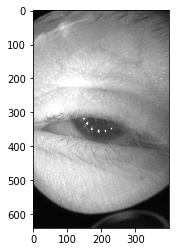

In [9]:
plt.imshow(img[0])

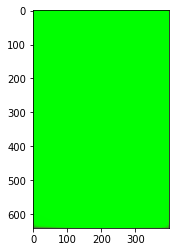

In [10]:
plt.imshow(pred[0])